Нехай все населення ($N індивідів$) ділиться на три групи: 

індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) — $S(t)$;

 заражені індивіди (infected) - $I (t)$ (вони хворі самі і є носіями хвороби),
 
 здорові індивіди, які мають імунітет до цієї хвороби (recovered) - $R (t)$.

 $S(t)+I(t)+R(t)=N \quad$ **(1)**

 Вважаємо, що коли кількість інфікованих перевищує певне фіксоване значення $I$
 , швидкість зміни кількості схильних до хвороби індивідів буде пропорційно кількості найсхильніших індивідів.

 $\frac{d S}{dt}=-\alpha S \quad$ **(2)**

 Тепер, коли кожен схильний до хвороби індивід зрештою занедужує і стає інфекційним, то швидкість зміни інфікованих індивідів - це різниця за одиницю часу між захворілими і тими, хто одужує.

 $\frac{d I}{dt}=\alpha S - \beta I \quad$ **(3)**

 Постійні пропорційності $\alpha$ і $\beta$ називають коефіцієнтами захворюваності та одужання відповідно.

Швидкість зміни кількості індивідів, що одужують:

$\frac{d R}{dt}=\beta I \quad$ **(4)**

Щоб рішення відповідних рівнянь визначалися однозначно, необхідно задати початкові умови. Приймемо, що:

$\alpha$=0.5

$\beta$=0.3

$N$=1000000

$S(0$)=990000

$I(0)$=7000

$R(0)$=3000

$t_{0}$, $t_{f}$ =0, 25

In [35]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [36]:
alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0 = 0
tf = 25

In [37]:
#1 Розв'язати диференціальне рівняння (2) та побудувати графік функції S(t)

def dsdt(t, y):
  S = y
  dSdt = -alpha * S
  return dSdt

sol2 = solve_ivp(dsdt, (t0, tf), [S0])

Text(0.5, 1.0, 'S(t)')

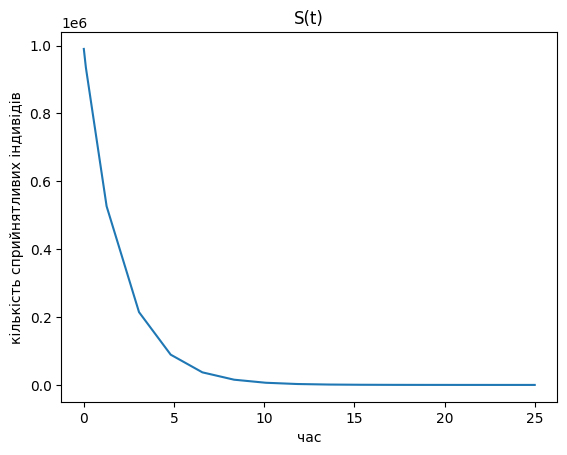

In [38]:
t, y = sol2.t, sol2.y[0]
plt.plot(t, y)
plt.xlabel('час')
plt.ylabel('кількість сприйнятливих індивідів')
plt.title('S(t)')

In [39]:
#2 Розв'язати диференціальне рівняння (3) та побудувати графік функції I(t)

def didt(t, y):
  S, I = y
  dSdt = -alpha * S
  dIdt = alpha * S - beta * I
  return dSdt, dIdt

sol3 = solve_ivp(didt, (t0, tf), [S0, I0])

Text(0.5, 1.0, 'I(t)')

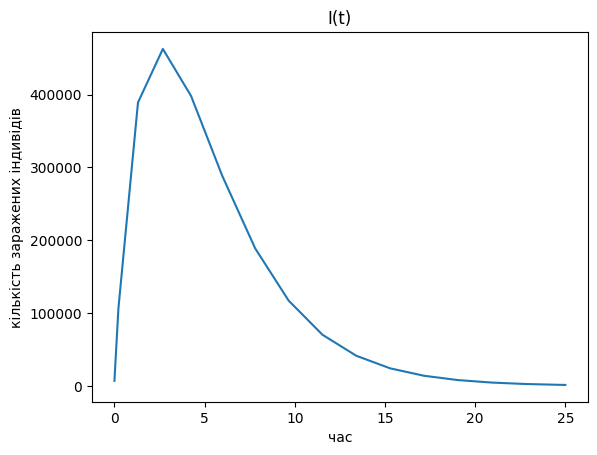

In [40]:
t, y = sol3.t, sol3.y[1]
plt.plot(t, y)
plt.xlabel('час')
plt.ylabel('кількість заражених індивідів')
plt.title('I(t)')

In [31]:
# Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію interp1d) 
# та побудувати графік функції R(t)

from scipy.interpolate import interp1d

In [32]:
I_interp = interp1d(sol3.t, sol3.y[1])

R = N - sol3.y[0] - sol3.y[1]

R_interp = interp1d(sol3.t, R)

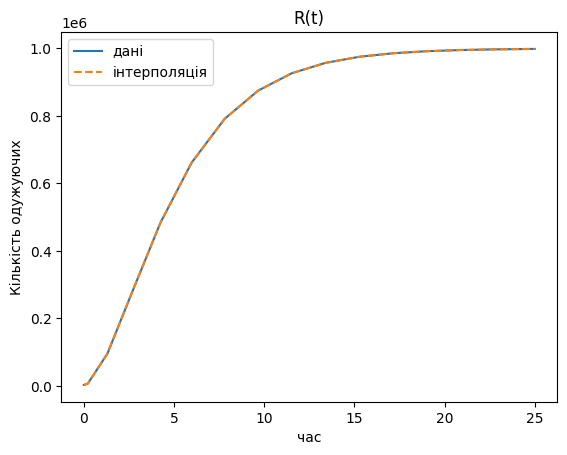

In [41]:
plt.plot(sol3.t, R, label='дані')
plt.plot(sol3.t, R_interp(sol3.t), '--', label='інтерполяція')
plt.xlabel('час')
plt.ylabel('Кількість одужуючих')
plt.title('R(t)')
plt.legend()

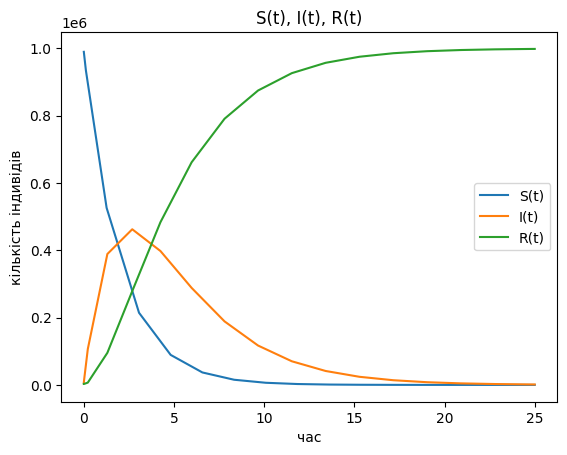

In [42]:
#4 Побудувати всі три графіки S(t), I(t) і R(t) на одній області відображення

fig, ax = plt.subplots()
ax.plot(sol2.t, sol2.y[0], label='S(t)')
ax.plot(sol3.t, sol3.y[1], label='I(t)')
ax.plot(sol3.t, R_interp(sol3.t), label='R(t)')
ax.set_xlabel('час')
ax.set_ylabel('кількість індивідів')
ax.set_title('S(t), I(t), R(t)')
ax.legend()